In [172]:
# TUGAS
# 1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
# 1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
# 2) tambahkan faktor-faktor ke objective function (jika perlu)
# 3) temukan titik optimum sesuai diri masing-masing, 
#    temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
# 4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat
#    poin 4 paling penting

# global optimum,
# idx = np.unravel_index(np.argmax(Z_clip), Z_clip.shape)
# opt_x, opt_y, opt_z = X[idx], Y[idx], Z_clip[idx]

# Analisis persebaran kegiatan dalam sehari

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [174]:
jam_tidur = 6 #berdasarkan tracking jam tidur 3 hari kebelakang

In [175]:
# waktu dalam sehari
xmin, xmax, ymin, ymax = 0, 24-jam_tidur, 0, 24-jam_tidur
res = 240
active_max = 24 - jam_tidur  # = 18 jam aktif
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main (scrolling IG, netflix time, dll)
X, Y = np.meshgrid(x, y) 
R = active_max - (X + Y)   # waktu yang tersisa digunakan untuk asah hobi dan softskill (baca buku, bermain alat musik, practice Bahasa jepang dan inggris,dan latihan public speaking), bisa negatif bila X+Y > active_max
R_target = 6  
bonus_hobi_R = 0.1 * np.exp(-((R - 4.0)**2) / (2*2**2))

In [176]:
# Preferensi jam kegiatan
kuliah_pref = np.exp(-((X - 8.0)**2) / (2*2**2))   # target kuliah 8 jam
main_pref   = np.exp(-((Y - 3.0)**2) / (2*2**2))   # target main 3 jam
kegiatankampus_pref = np.exp(-((X - 2.0)**2) / (2*2**2))   # target kegiatan di kampus (diluar kelas) 2 jam
hobi_pref = np.exp(-((Y - 2.0)**2) / (2*2**2))   # target hobi (termasuk pengembangan skill) 2 jam
tugaslomba_pref = np.exp(-((X - 3.0)**2) / (2*2**2))   # target nugas kuliah dan nugas project lomba 3 jam
     

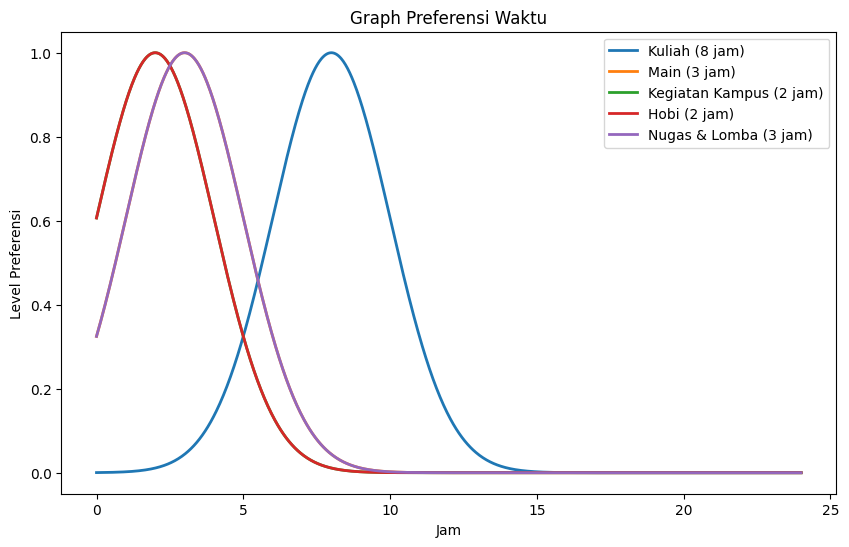

In [177]:
x_plot = np.linspace(0, 24, 1000)
kuliah_pref_1d = np.exp(-((x_plot - 8.0)**2) / (2*2**2))   
main_pref_1d = np.exp(-((x_plot - 3.0)**2) / (2*2**2))     
kegiatankampus_pref_1d = np.exp(-((x_plot - 2.0)**2) / (2*2**2))  
hobi_pref_1d = np.exp(-((x_plot - 2.0)**2) / (2*2**2))    
tugaslomba_pref_1d = np.exp(-((x_plot - 3.0)**2) / (2*2**2))  

# Plot preferensi awal (diperbaiki menjadi 1D)
plt.figure(figsize=(10, 6))
plt.plot(x_plot, kuliah_pref_1d, label="Kuliah (8 jam)", linewidth=2)
plt.plot(x_plot, main_pref_1d, label="Main (3 jam)", linewidth=2)
plt.plot(x_plot, kegiatankampus_pref_1d, label="Kegiatan Kampus (2 jam)", linewidth=2)
plt.plot(x_plot, hobi_pref_1d, label="Hobi (2 jam)", linewidth=2)
plt.plot(x_plot, tugaslomba_pref_1d, label="Nugas & Lomba (3 jam)", linewidth=2)
plt.legend()
plt.title("Graph Preferensi Waktu")
plt.xlabel("Jam")
plt.ylabel("Level Preferensi")
plt.show()

In [178]:
total_waktu = X + Y
total_penalty = 0.3 * np.exp(total_waktu / 24.0)  # Penalti total waktu
     

In [188]:
#penalti
# kelupaan (terlalu banyak main)
A_kelupaan = 1.5
kelupaan = A_kelupaan * np.exp(-(((X - 2.0)**2 + (Y - 10.0)**2)) / (2.0**2))
# fatigue (terlalu banyak kuliah)
A_fatigue = 2.0
fatigue = A_fatigue * np.exp(-(((X - 11.0)**2 + (Y - 1.5)**2)) / (2.0**2))
# kurang istirahat (diperbaiki: istirahat aktual = 24 - X - Y)
kurang_tidur = 3.0 * np.maximum(R_target - (24 - X - Y), 0.0)

# Kurang istirahat (penalti linier jika istirahat < R_target)
istirahat_aktual = 24 - X - Y  # Estimasi sisa waktu untuk tidur/istirahat
kurang_tidur = 3.0 * np.maximum(R_target - istirahat_aktual, 0.0)  # Hanya aktif jika <7 jam
# Over time (penalti eksponensial jika X+Y >24, area merah fokus)
over_time_excess = np.maximum(X + Y - 24.0, 0.0)
over_time_penalty = 5.0 * np.exp(over_time_excess / 3.0)
total_penalty_exp = 0.3 * np.exp(total_waktu / 24.0)



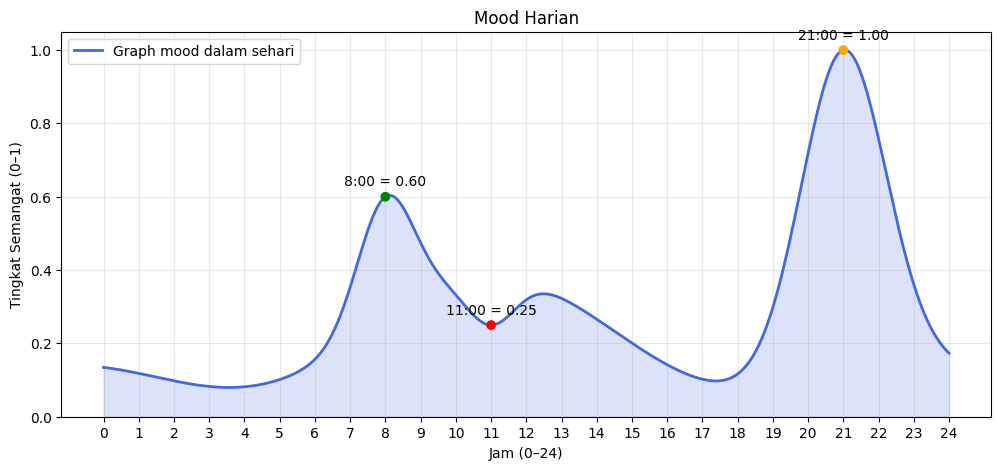

In [180]:
#Naik turun mood / motivasi harian
NPM = 52
np.random.seed(NPM)
x = np.linspace(0, 24, 1000)
noise = np.random.normal(loc=0.0, scale=0.05, size=X.shape)
ripple = 0.4 * np.sin((0.3 * X) - 1) * np.cos(1.0 * Y) * np.cos(0.5 * R) - 0.2
ripple += noise

omega = np.pi / 12  # 2*pi / 24
base = 0.18 + 0.12 * np.sin(omega * x - 1.3) + 0.08 * np.cos((np.pi/6) * x + 0.5)
def gauss(center, width):
    return np.exp(-0.5 * ((x - center) / width) ** 2)
t8, t11, t21 = 8.0, 11.0, 21.0
desired8, desired11, desired21 = 0.6, 0.25, 1.0
base_at_8 = base[np.argmin(np.abs(x - t8))]
amp8 = max(desired8 - base_at_8, 0.0)           # jangan negatif
bump8 = amp8 * gauss(8, 0.8)                   # lebar ~1 jam
y1 = base + bump8
y1_at_11 = y1[np.argmin(np.abs(x - t11))]
amp11 = desired11 - y1_at_11                    # biasanya negatif -> menurunkan
bump11 = amp11 * gauss(11, 0.7)                 # lebar agak sempit supaya lokal

y2 = y1 + bump11
y2_at_21 = y2[np.argmin(np.abs(x - t21))]
amp21 = max(desired21 - y2_at_21, 0.0)
bump21 = amp21 * gauss(21, 1.2)                 # puncak lebih lebar (malam)
y = y2 + bump21
y = np.clip(y, 0, 1)  # pastikan tetap di [0,1]
plt.figure(figsize=(12,5))
plt.plot(x, y, color='royalblue', lw=2, label='Graph mood dalam sehari')
plt.fill_between(x, 0, y, color='royalblue', alpha=0.18)
idx8  = np.argmin(np.abs(x - t8))
idx11 = np.argmin(np.abs(x - t11))
idx21 = np.argmin(np.abs(x - t21))
plt.scatter([t8,t11,t21], [y[idx8], y[idx11], y[idx21]],
            color=['green','red','orange'], zorder=5)
plt.text(t8,  y[idx8]+0.03,  f"8:00 = {y[idx8]:.2f}", ha='center')
plt.text(t11, y[idx11]+0.03, f"11:00 = {y[idx11]:.2f}", ha='center')
plt.text(t21, y[idx21]+0.03, f"21:00 = {y[idx21]:.2f}", ha='center')

plt.xticks(range(0,25))
plt.ylim(0, 1.05)
plt.xlabel("Jam (0–24)")
plt.ylabel("Tingkat Semangat (0–1)")
plt.title("Mood Harian")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [181]:
# fungsi objektif
Z = 10 * (0.4 * kuliah_pref + 0.2 * main_pref + 0.1 * kegiatankampus_pref + 
          0.1 * hobi_pref + 0.2 * tugaslomba_pref)  # Preferensi utama
Z = Z - (kelupaan + fatigue + kurang_tidur + total_penalty_exp)
Z = Z + bonus_hobi_R + ripple 
Z -= kelupaan + fatigue + kurang_tidur + total_penalty  # Semua penalti
Z += 0.1 * np.exp(-((R - 4.0)**2) / (2*2**2))  # Faktor tambahan: bonus hobi (tugas 2)
Z -= 10.0 * np.maximum(X + Y - 24.0, 0.0)  # Penalti over 24 jam
Z_clip = np.clip(Z, -5, 20)

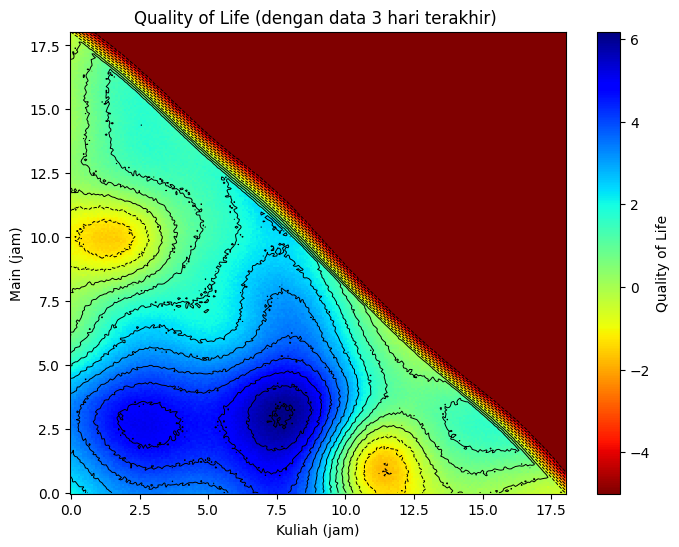

In [182]:
plt.figure(figsize=(8,6))
c = plt.pcolormesh(X, Y, Z_clip, cmap="jet_r", shading="auto")
contours = plt.contour(X, Y, Z_clip, levels=20, colors="black", linewidths=0.7)
plt.colorbar(c, label="Quality of Life")
plt.xlabel("Kuliah (jam)")
plt.ylabel("Main (jam)")
plt.title("Quality of Life (dengan data 3 hari terakhir) ")
plt.show()


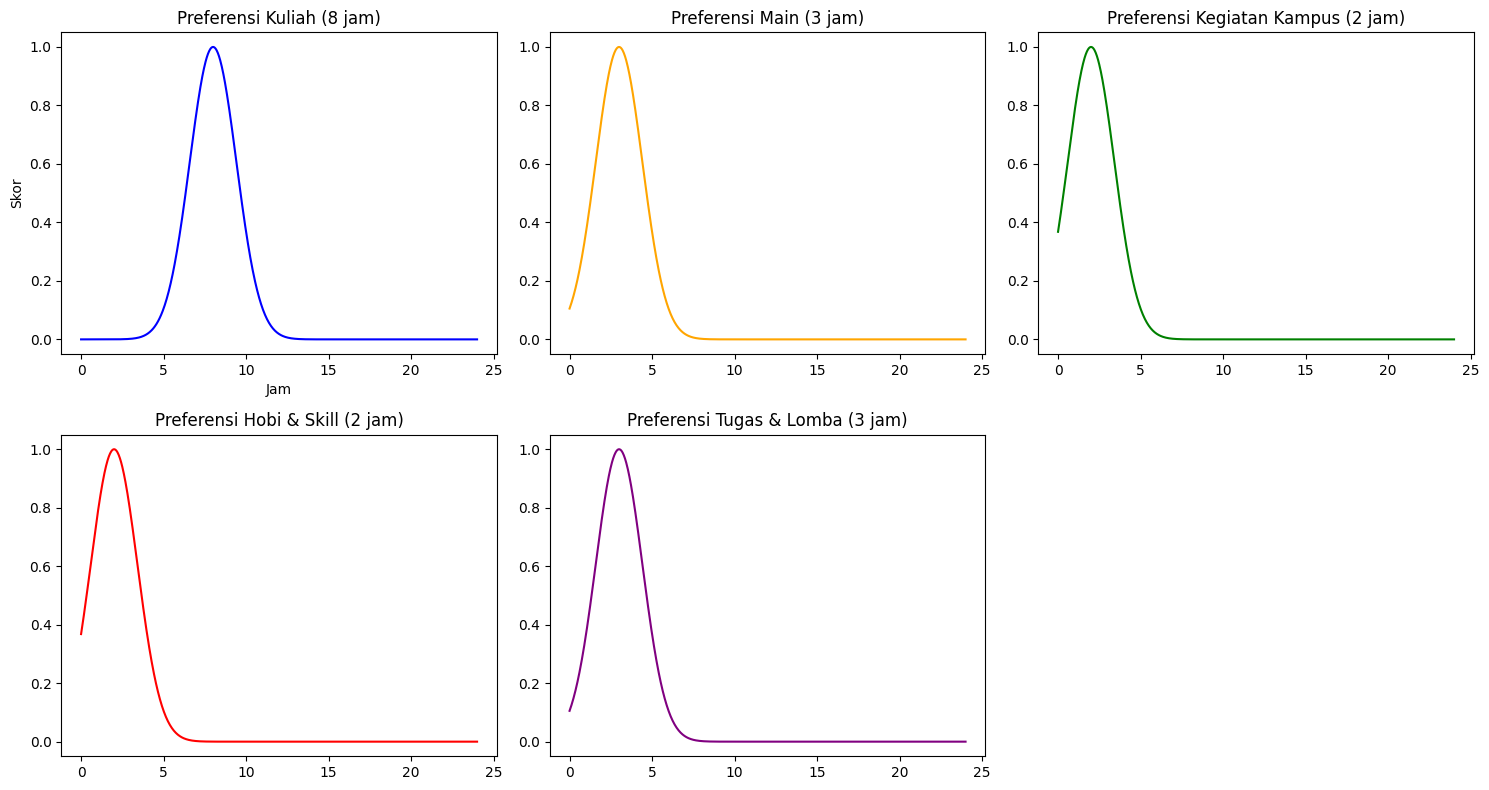

In [183]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Kuliah
axes[0,0].plot(x, np.exp(-((x - 8.0)**2) / (2*2)), color="blue")
axes[0,0].set_title("Preferensi Kuliah (8 jam)")
axes[0,0].set_xlabel("Jam")
axes[0,0].set_ylabel("Skor")

# Main
axes[0,1].plot(x, np.exp(-((x - 3.0)**2) / (2*2)), color="orange")
axes[0,1].set_title("Preferensi Main (3 jam)")

# Kegiatan Kampus
axes[0,2].plot(x, np.exp(-((x - 2.0)**2) / (2*2)), color="green")
axes[0,2].set_title("Preferensi Kegiatan Kampus (2 jam)")

# Hobi / Skill
axes[1,0].plot(x, np.exp(-((x - 2.0)**2) / (2*2)), color="red")
axes[1,0].set_title("Preferensi Hobi & Skill (2 jam)")

# Tugas & Lomba
axes[1,1].plot(x, np.exp(-((x - 3.0)**2) / (2*2)), color="purple")
axes[1,1].set_title("Preferensi Tugas & Lomba (3 jam)")

# Kosongin 1 plot biar rapi
axes[1,2].axis("off")

plt.tight_layout()
plt.show()



In [184]:

# Grid search manual (metode 1: brute-force di grid)
best_score_grid = -np.inf
best_x_grid, best_y_grid = None, None
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        val = Z_clip[i, j]
        if np.isfinite(val) and val > best_score_grid:
            best_score_grid = val
            best_x_grid = X[i, j]
            best_y_grid = Y[i, j]
print(f"Titik optimum: {best_x_grid:.2f} jam, Main {best_y_grid:.2f} jam, QOL={best_score_grid:.2f}")


Titik optimum: 7.68 jam, Main 3.16 jam, QOL=6.18


Saya mengambil kebisaan sehari-hari dalam 3 hari terakhir

Saya tidur jam 11 malam dam biasanya bangun jam 4.30 pagi atau jam 5 pagi dan pastinya diawali dengan sholat subuh.
saya berangkat ke kampus jam 6 atau jam 7 atau jam 10 (tergantung matakuliah dan jadwal).

Jadwal kuliah saya adalah 3 hari dengan 9 sks, 6 sks, dan 8 sks di hari senin, selasa, dan kamis, saya berusaha tetap tersadar dan semangat walaupun denganwaktu pagi sudah dihajar oleh matematika diskrit, menyenangkan untungnya.

Kuliah berakhir jam 16.00, dengan semua ilmu yang telah didapatkan, biasanya saya tidak langsung kembali ke rumah, menjalankan kewajiban non akademik bisa jadi perihal selanjutnya, atau dengan perihal lain saya mengerjakan tugas secara kolektif dengan teman-teman untuk tindakan preventif segala kantuk dan lelah yang terkadang tidak tau waktu dan tugas. Kemudian pulang sekitar jam 8/9 malam dengan ledakan energi yang entah bersumbu dari mana itu. Mereview sedikit apa yang dibutuhkan di perkuliahan dan kehidupan besok sebelum kembali menyandarkan tubuhku ke kasur untuk melepas penat dan hingar bingar seharian.

Saya menyisakan waktu sekitar 3 jam untuk main atau refereshing, 2 jam untuk hobby (membaca buku, bermain alat musik, pergi ke taman, dll) dan self development (melatih berbicara di depan banyak orang, berlatih bahasa inggris dan jepang, dan meditasi) dan 3 jam untuk mengerjakan tugas (rata-rata) serta mengerjakan project lomba, dan sisanya untuk kegiatan kampus non akademik.

Saya paling merasa semangat ketika sekitar jam 8 pagi dan jam 9 malam , dan paling mengantuk sekitar jam 7 pagi, jam 11 siang, dan jam 6-7 sore, dimana jam-jam tersebut saya merasa mengantuk dan lelah sekali entah karena siklus tidur saya yang tidak optimal atau emang over fatigue (penalti kurang tidur).
Jam 11 malam adalah rata-rata saya mulai terlelap tidur, kasur menopang semua rasa lelah seharian yang belum seberapa itu jika dibandingkan dengan orang tua saya.

Alhamdulillah banyak kurangnya tapi setidaknya saya mau mencoba.
Kurang lebihnya Terima Kasih, kepada Allah, kepada saya, dan semuanya.
